In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from scipy.stats import stats
%matplotlib inline
from IPython.display import display

cwd = os.getcwd()

In [2]:
# read the df
df = pd.read_csv(os.path.join(cwd, "Time_Series",
                              "202010-citibike-tripdata.csv.zip"), compression="zip")

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1


In [3]:
list(df.columns)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'usertype',
 'birth year',
 'gender']

In [4]:
#transform data

df = df[['tripduration',
 'starttime']]

df.head()

,tripduration,starttime
0,1403,2020-10-01 00:00:10.7870
1,462,2020-10-01 00:00:18.2390
2,770,2020-10-01 00:00:21.3070
3,233,2020-10-01 00:00:25.0080
4,126,2020-10-01 00:00:25.3100


In [5]:
df['trip count'] = 1

df.head()

,tripduration,starttime,trip count
0,1403,2020-10-01 00:00:10.7870,1
1,462,2020-10-01 00:00:18.2390,1
2,770,2020-10-01 00:00:21.3070,1
3,233,2020-10-01 00:00:25.0080,1
4,126,2020-10-01 00:00:25.3100,1


In [6]:
df = df.drop('tripduration', axis=1)

df.head()

,starttime,trip count
0,2020-10-01 00:00:10.7870,1
1,2020-10-01 00:00:18.2390,1
2,2020-10-01 00:00:21.3070,1
3,2020-10-01 00:00:25.0080,1
4,2020-10-01 00:00:25.3100,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248869 entries, 0 to 2248868
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   starttime   object
 1   trip count  int64 
dtypes: int64(1), object(1)
memory usage: 34.3+ MB


In [8]:
df['starttime']= pd.to_datetime(df['starttime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248869 entries, 0 to 2248868
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   starttime   datetime64[ns]
 1   trip count  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 34.3 MB


In [10]:
df = df.groupby(pd.Grouper(key='starttime', freq='H')).sum()

df

,trip count
starttime,
2020-10-01 00:00:00,879
2020-10-01 01:00:00,413
2020-10-01 02:00:00,240
2020-10-01 03:00:00,145
2020-10-01 04:00:00,181
...,...
2020-10-31 19:00:00,2900
2020-10-31 20:00:00,2232
2020-10-31 21:00:00,1603


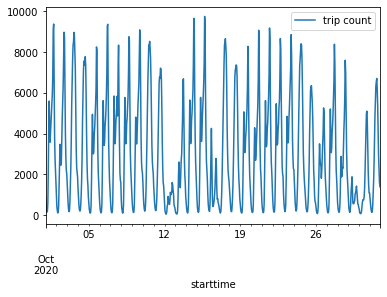

In [11]:
df.plot()
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 Plot.png"));

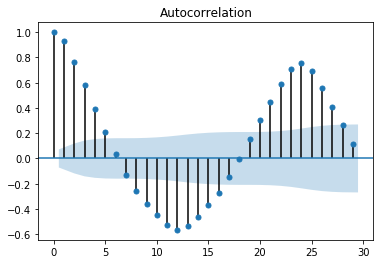

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 Autocorrelation.png"));

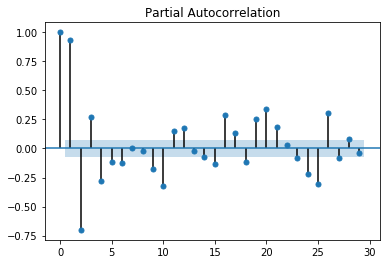

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df)
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 Partial Autocorrelation.png"));

In [14]:
#first order differencing

df_d1 = df - df.shift()
df_d1 = df_d1[1:(len(df_d1) - 1)]

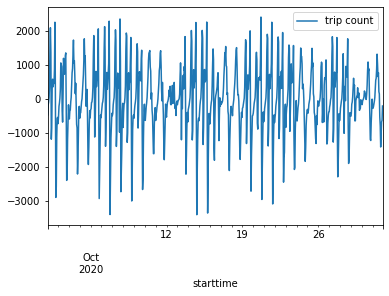

In [15]:
df_d1.plot()
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 First Difference Plot.png"));

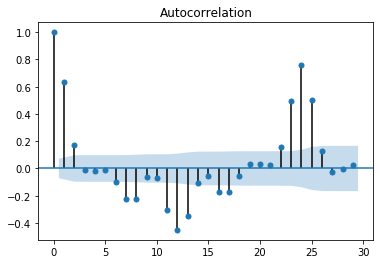

In [16]:
plot_acf(df_d1)
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 First Difference Autocorrelation.png"));

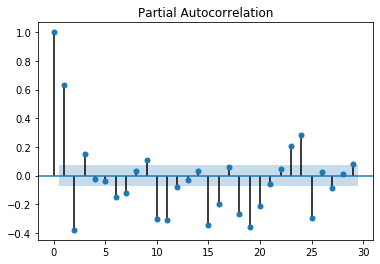

In [17]:
plot_pacf(df_d1)
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 First Difference Partial Autocorrelation.png"));

In [18]:
# shift on a seasonlity of 24 hours
df_d24 = df_d1 - df_d1.shift(24)
df_d24 = df_d24[24:len(df_d24) - 24]

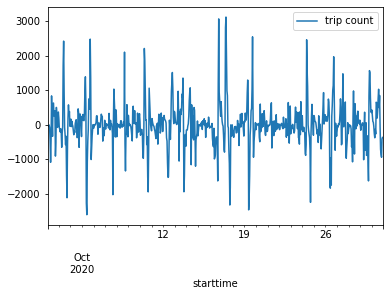

In [19]:
df_d24.plot()
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 24 Difference Plot.png"));

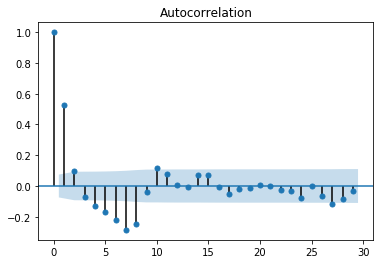

In [20]:
plot_acf(df_d24)
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 24 Difference Autocorrelation.png"));

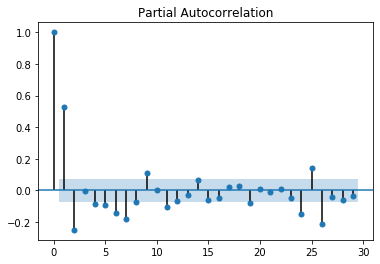

In [21]:
plot_pacf(df_d24)
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 First Difference Partial Autocorrelation.png"));

In [22]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(
    df, 
    trend='n', 
    order = (0,1,1), 
    seasonal_order = (0,1,1,24)
)
results = mod.fit()
                                
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         trip count   No. Observations:                  744
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 24)   Log Likelihood               -5466.262
Date:                            Sun, 13 Dec 2020   AIC                          10938.524
Time:                                    15:31:11   BIC                          10952.258
Sample:                                10-01-2020   HQIC                         10943.826
                                     - 10-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6225      0.026     23.890      0.000       0.571       0.674
ma.S.L24      -0.9942      0.165   

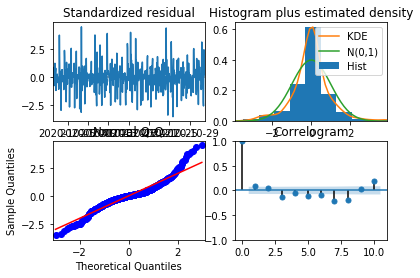

In [23]:
results.plot_diagnostics()
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-10 24 Difference Diagnostics.png"));

In [25]:
df_test = pd.read_csv(os.path.join(cwd, "Time_Series",
                              "202011-citibike-tripdata.csv.zip"), compression="zip")

In [26]:
df_test['trip count'] = 1

df_test = df_test[['trip count',
 'starttime']]

df_test['starttime']= pd.to_datetime(df_test['starttime'])

df_test = df_test.groupby(pd.Grouper(key='starttime', freq='H')).sum()

df_test.head()

,trip count
starttime,
2020-11-01 00:00:00,1193
2020-11-01 01:00:00,536
2020-11-01 02:00:00,350
2020-11-01 03:00:00,217
2020-11-01 04:00:00,194


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2020-11-01 00:00:00 to 2020-11-30 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   trip count  720 non-null    int64
dtypes: int64(1)
memory usage: 11.2 KB


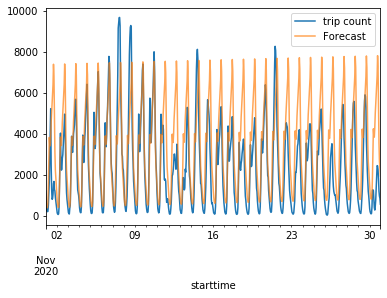

In [28]:
#using model, forecast trips 1 month into future
pred = results.get_forecast(steps = 720)

#get confidence intervals of forecasts
pred_ci = pred.conf_int()

#plot
ax = df_test.plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'Forecast', alpha=.7)

plt.legend()
plt.savefig(os.path.join(cwd, "images", "Time_Series", "2020-11 versus 2020-10 Forecast.png"));